In [1]:
# KNN Classification
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Zoo.csv')
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
features = list(df.columns)
features

['animal name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'type']

In [4]:
df.drop(['animal name'], axis=1, inplace=True)
df



,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2)

In [6]:
# Importing Knn algorithm from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier as KNC


In [24]:
neigh = KNC(n_neighbors= 5)


In [25]:
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])

In [27]:
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])

In [29]:
# for 7 nearest neighbours
neigh = KNC(n_neighbors=7)

In [30]:
# fitting with training data
neigh.fit(train.iloc[:,0:16],train.iloc[:,16])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [31]:
# train accuracy 
train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])


In [32]:
# test accuracy
test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])


In [33]:
acc = []


In [34]:
for i in range(3,50,2):
    neigh = KNC(n_neighbors=i)
    neigh.fit(train.iloc[:,0:16],train.iloc[:,16])
    train_acc = np.mean(neigh.predict(train.iloc[:,0:16])==train.iloc[:,16])
    test_acc = np.mean(neigh.predict(test.iloc[:,0:16])==test.iloc[:,16])
    acc.append([train_acc,test_acc])


In [35]:
import matplotlib.pyplot as plt # library to do visualizations 


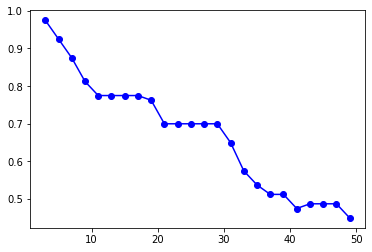

In [36]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"bo-")

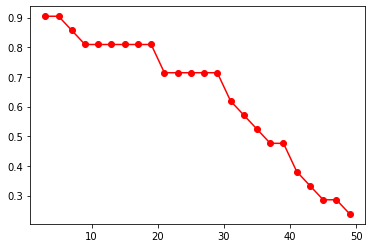

In [37]:
# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"ro-")

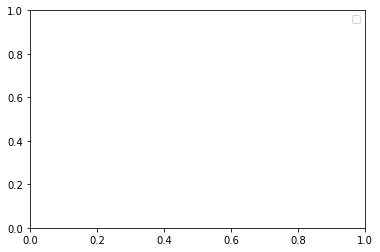

In [38]:
plt.legend(['train','test'])
